In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [2]:
housing = pd.read_csv("Ames_Housing_Price_Data.csv", index_col=0)

In [4]:
housing = housing.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

In [5]:
housing = housing.replace({"Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6})

In [14]:
qcc = housing.copy()

In [15]:
qcc = qcc.filter(regex='Qual$|Qu$|QC$|Fence$|Type1$|Type2$|Cond$|\
Mas$|Exterior$|Shape$|Alley$|Street$|Contour$|RoofStyle$|RoofMatl$|Config$|Slope$|Frontage$|LotArea$')

In [ ]:
n = qcc.copy()
n = pd.get_dummies(n)

In [18]:
n.isnull().sum(axis=0)

LotFrontage           462
LotArea                 0
OverallQual             0
OverallCond             0
ExterQual               0
ExterCond               0
BsmtQual               69
BsmtCond               69
BsmtFinType1           69
BsmtFinType2           70
HeatingQC               0
KitchenQual             0
FireplaceQu          1241
GarageQual            129
GarageCond            129
PoolQC               2571
Street_Grvl             0
Street_Pave             0
Alley_Grvl              0
Alley_Pave              0
LotShape_IR1            0
LotShape_IR2            0
LotShape_IR3            0
LotShape_Reg            0
LandContour_Bnk         0
LandContour_HLS         0
LandContour_Low         0
LandContour_Lvl         0
LotConfig_Corner        0
LotConfig_CulDSac       0
LotConfig_FR2           0
LotConfig_FR3           0
LotConfig_Inside        0
LandSlope_Gtl           0
LandSlope_Mod           0
LandSlope_Sev           0
RoofStyle_Flat          0
RoofStyle_Gable         0
RoofStyle_Ga

In [19]:
n = n.replace(np.nan, 0)

In [20]:
n.isnull().sum(axis=0)

LotFrontage          0
LotArea              0
OverallQual          0
OverallCond          0
ExterQual            0
ExterCond            0
BsmtQual             0
BsmtCond             0
BsmtFinType1         0
BsmtFinType2         0
HeatingQC            0
KitchenQual          0
FireplaceQu          0
GarageQual           0
GarageCond           0
PoolQC               0
Street_Grvl          0
Street_Pave          0
Alley_Grvl           0
Alley_Pave           0
LotShape_IR1         0
LotShape_IR2         0
LotShape_IR3         0
LotShape_Reg         0
LandContour_Bnk      0
LandContour_HLS      0
LandContour_Low      0
LandContour_Lvl      0
LotConfig_Corner     0
LotConfig_CulDSac    0
LotConfig_FR2        0
LotConfig_FR3        0
LotConfig_Inside     0
LandSlope_Gtl        0
LandSlope_Mod        0
LandSlope_Sev        0
RoofStyle_Flat       0
RoofStyle_Gable      0
RoofStyle_Gambrel    0
RoofStyle_Hip        0
RoofStyle_Mansard    0
RoofStyle_Shed       0
RoofMatl_CompShg     0
RoofMatl_Me

In [22]:
X = n

In [25]:
m = housing.copy()

In [26]:
m['SalePrice1'] = np.log10(m['SalePrice'])

In [34]:
m['SalePrice1'] = m['SalePrice1'].astype(np.int64)

In [35]:
y1 = m['SalePrice1']

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [37]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs          Score
1        LotArea  206385.328604
12   FireplaceQu     263.927275
8   BsmtFinType1     176.557425
0    LotFrontage     147.298010
2    OverallQual     123.215613
6       BsmtQual      66.282664
14    GarageCond      64.623890
13    GarageQual      64.406244
10     HeatingQC      32.822123
20  LotShape_IR1      26.664903


[7.59201431e-02 1.00079216e-01 1.30880404e-01 6.96353078e-02
 1.63872112e-02 2.76144333e-02 6.24697690e-02 4.00165455e-02
 5.81227137e-02 1.32278446e-02 5.51908020e-02 2.95382969e-02
 3.93173308e-02 4.83284656e-02 6.62336657e-02 8.20165066e-04
 4.60665384e-03 5.57670328e-03 1.55184669e-02 3.09902243e-03
 6.71644948e-03 6.29648764e-04 1.63423759e-03 1.22894107e-02
 7.01690665e-03 3.87667930e-03 1.46308527e-03 7.09166164e-03
 1.37021112e-02 5.11245281e-04 5.90967540e-03 6.77963628e-04
 1.04086329e-02 6.24281450e-03 3.00817151e-03 2.84614593e-06
 1.80422257e-04 7.25985892e-03 3.49488477e-03 8.42931410e-03
 3.40123335e-03 0.00000000e+00 1.22056803e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.10243118e-03 0.00000000e+00
 0.00000000e+00 4.98902654e-03 9.88740114e-03 1.60505660e-02
 2.19593085e-04]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


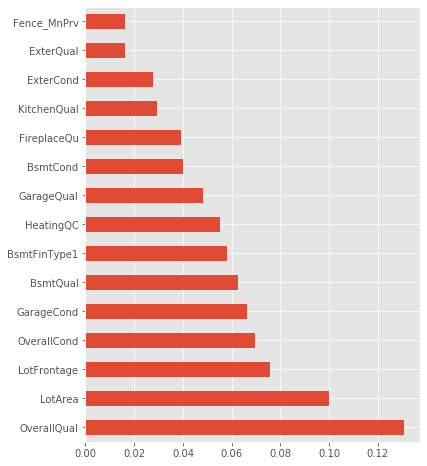

In [44]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(6,8))
plt.show()